# Eight Queens Genetic Algorithim

a) generate population

In [1]:
import random

def _generate_genotype(number_of_queens):
    return  [random.randrange(number_of_queens) for num in range(number_of_queens )]


def generate_population(number_of_queens=8, size_of_population=19):
        return [_generate_genotype(number_of_queens) for _ in range(size_of_population)]

generate_population(3, 3)

[[1, 2, 1], [1, 0, 1], [2, 1, 2]]

b) fitness function

In [2]:
def fitness_function(genotype):
    """finds a score based off the number of queens which are not being attacked
    """
    fitness_score = 0

    for i_p, phenotype in enumerate(genotype):
        for i_o_p, other_phenotype in enumerate(genotype):
            if phenotype == other_phenotype:
                # is on the same row
                continue
            if i_p - phenotype == i_o_p - other_phenotype:
                # is diagonally attacked
                continue
            if i_p + phenotype == i_o_p + other_phenotype:
                # is diagonally attacked
                continue
            fitness_score += 1
    
    return fitness_score / 2


assert fitness_function([7,1,4,2,0,6,3,5]) == 28
assert fitness_function([7,2,4,2,0,6,3,2]) == 23
assert fitness_function([1,1,1,1,0,6,3,2]) == 19
assert fitness_function([1,1,1,1,1,1,1,1]) == 0
assert fitness_function([1,2,3,4,5,6,7,8]) == 0

c)	selection:

In [3]:

def selection(population, fitness_scores, size_of_population):
    """return a list of selected pairs"""

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(population, fitness_scores)
        parent_two = _random_weighted_choice(population, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected


def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights"""

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    # avoid zero weights constraint
    if sum(weights) == 0.0:
        weights[0] = 0.1

    return random.choices(population, weights=weights, k=1)[0]

population = generate_population(3, 5)
fitness_scores = [fitness_function(genotype) for genotype in population]
print("initial populations:")
print(population)
print("fitness scores:")
print(fitness_scores)
print("selected parents")
selection(population, fitness_scores, 3)


initial populations:
[[2, 0, 1], [0, 1, 1], [0, 0, 1], [2, 2, 0], [0, 0, 0]]
fitness scores:
[2.0, 1.0, 1.0, 1.0, 0.0]
selected parents


[([2, 2, 0], [0, 1, 1]), ([0, 1, 1], [2, 2, 0]), ([2, 2, 0], [2, 0, 1])]

d)	Crossover

In [4]:

def crossover(selected_pairs, number_of_queens):

    offspring = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        offspring.append(child)

    return offspring


def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")

crossover(selected_parents, 3)

selected parents
[([0, 2, 0], [2, 0, 0]), ([0, 2, 0], [2, 0, 0]), ([0, 2, 0], [2, 0, 0])]
offspring


[[0, 0, 0], [2, 0, 0], [0, 0, 0]]

e)  mutation

In [5]:
import random


def _mutate(current_value, number_of_queens):
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    return new_value


def mutation(population, mutation_frequency, number_of_queens):        
    for genotype in population:
        for s_i,_ in enumerate(genotype):
            x = random.randint(1, mutation_frequency)
            if x == 1:
                genotype[s_i] = _mutate(genotype[s_i], number_of_queens)
    return population


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)
offspring = crossover(selected_parents, 3)
print("offspring")
print(offspring)
print("mutated")

mutation(population, 2, 3)

offspring
[[0, 0, 2], [1, 0, 2], [1, 2, 2]]
mutated


[[1, 0, 1], [2, 0, 2], [1, 1, 0]]

generation

In [6]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


([[1, 0, 2], [2, 2, 2], [0, 2, 0]], [0.0, 1.0, 1.0])

check for completion and calclate perfect score

In [7]:
from scipy import special

def check_for_perfect_genotype(population, fitness_scores, perfect_score):
    for i,score in enumerate(fitness_scores):
        if score == perfect_score:
            return population[i]

    return []

def calculate_perfect_score(number_of_queens):
    return special.comb(
                    number_of_queens,
                    2
                )


calculate_perfect_score(8)

28.0

In [20]:
## reduce homogenity

def reduce_homogenity(population, number_of_queens, size_of_population):

    number_of_elite_genotypes = 5
    elite = _fetch_elite(population, number_of_elite_genotypes)

    new_population = generate_population(
                            number_of_queens,
                            size_of_population - number_of_elite_genotypes
                        )
    return new_population + elite


def _fetch_elite(population, number_of_elite_genotypes=5):
    fitness_socres = [(pop, fitness_function(pop)) for pop in population]
    sorted_by_score = sorted(fitness_socres, key=lambda x: x[1], reverse=True)
    sorted_by_score = sorted_by_score[:number_of_elite_genotypes]
    return [item[0] for item in sorted_by_score]


population = generate_population(3, 10)
reduce_homogenity(population, 3, 10)

[[2, 1, 0], [2, 1, 0], [2, 0, 0], [0, 0, 1], [2, 2, 1], [1, 2, 2], [0, 1, 0], [2, 0, 2], [0, 0, 1], [2, 0, 1]]


[[1, 2, 0],
 [2, 0, 0],
 [0, 1, 2],
 [0, 2, 2],
 [2, 2, 0],
 [2, 0, 2],
 [2, 0, 1],
 [2, 0, 0],
 [0, 0, 1],
 [2, 2, 1]]

Full algorithim

In [26]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, fitness_scores, PERFECT_SCORE)
        gen += 1

        if gen % 3000 == 0:
            print("generated new population")
            population = reduce_homogenity(population,NUMBER_OF_QUEENS, SIZE_OF_POPULATION)
        if gen == 100000:
            break
        # if gen % 1000 == 0:
        #     print(f"run for {gen} generations")

    stop_time = timeit.default_timer()

    print(f"elapsed_time: {stop_time - start_time}")
    print(f"number_of_generations: {gen}")
    print(f"completed_state: {completed_genotype}")
    print("=========================")

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

generated new population
generated new population
elapsed_time: 13.423905300000115
number_of_generations: 7722
completed_state: [2, 0, 0, 2, 6, 4, 2, 4]


{'elapsed_time': 13.423905300000115,
 'number_of_generations': 7722,
 'completed_state': [2, 0, 0, 2, 6, 4, 2, 4]}

In [27]:
# # generate test population
# # only need to do this once

# import pickle

test_populations_name = 'test_populations_25'


# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open(test_populations_name, 'wb') as f:
#         pickle.dump(test_population, f)

In [28]:
# run algo on all test populations

import pickle

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

results

elapsed_time: 6.239931600000091
number_of_generations: 2448
completed_state: [6, 3, 4, 5, 7, 3, 6, 2]
generated new population
generated new population
generated new population
generated new population
elapsed_time: 26.747395699999288
number_of_generations: 13458
completed_state: [0, 2, 5, 1, 7, 7, 0, 4]
generated new population
generated new population
elapsed_time: 12.842665099999977
number_of_generations: 7213
completed_state: [6, 3, 0, 7, 1, 0, 7, 4]
generated new population
generated new population
elapsed_time: 12.752858000000742
number_of_generations: 6802
completed_state: [7, 4, 1, 4, 6, 6, 3, 0]
elapsed_time: 4.216869400000178
number_of_generations: 1739
completed_state: [4, 1, 5, 0, 5, 7, 3, 4]
elapsed_time: 2.1173375999997006
number_of_generations: 1063
completed_state: [3, 5, 0, 5, 6, 6, 7, 6]
generated new population
elapsed_time: 4.840138800000204
number_of_generations: 3190
completed_state: [5, 3, 2, 0, 5, 7, 3, 2]
generated new population
generated new population
genera

{'elapsed_time': [6.239931600000091,
  26.747395699999288,
  12.842665099999977,
  12.752858000000742,
  4.216869400000178,
  2.1173375999997006,
  4.840138800000204,
  30.68764199999987,
  9.748843500000476,
  1.6395088999997824,
  5.192473699999937,
  14.920221800000036,
  22.560357000000295,
  2.486797200000183,
  10.401536100000158,
  10.31580169999961,
  0.5033862999998746,
  8.831410400000095,
  4.847170799999731,
  12.991407600000457,
  0.9573528999999326,
  11.002068599999802,
  3.814541200000349,
  4.443419799999901,
  4.614375399999517,
  7.341539699999885,
  1.4381725000002916,
  15.375434800000221,
  5.940438399999948,
  9.454234999999244,
  4.683015100000375,
  8.43142059999991,
  5.805163200000607,
  12.142817099999775,
  2.3305616999996346,
  17.989574000000175,
  36.943618699999206,
  0.8947588999999425,
  13.042695800000729,
  2.136848899999677,
  9.210244500000044,
  0.5715690000006362,
  4.78172480000012,
  9.461945000000014,
  1.6180727000000843,
  17.41339049999987

In [29]:
import os

unique_identifier = "100_results_reset_reduce_homogenity_3000_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "perfect_score": PERFECT_SCORE
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


In [30]:
import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


    elapsed_time  number_of_generations           completed_state
0       6.239932                   2448  [6, 3, 4, 5, 7, 3, 6, 2]
1      26.747396                  13458  [0, 2, 5, 1, 7, 7, 0, 4]
2      12.842665                   7213  [6, 3, 0, 7, 1, 0, 7, 4]
3      12.752858                   6802  [7, 4, 1, 4, 6, 6, 3, 0]
4       4.216869                   1739  [4, 1, 5, 0, 5, 7, 3, 4]
..           ...                    ...                       ...
95      5.210460                   2996  [3, 1, 5, 2, 5, 7, 1, 1]
96      0.539708                    374  [4, 6, 1, 2, 2, 5, 0, 4]
97      2.937930                   1969  [2, 4, 3, 3, 3, 5, 1, 2]
98     14.709600                   9857  [3, 3, 4, 3, 5, 3, 2, 2]
99      7.835289                   4851  [3, 5, 0, 2, 5, 0, 4, 7]

[100 rows x 3 columns]
mean_number_of_generations: 4537.59
std_number_of_generations: 4083.4697765577507
mean_elapsed_time: 7.638187827000001
std_elapsed_time: 6.915574386030137


In [31]:
# check all results finish
results_df[results_df["elapsed_time"] > 30]

,elapsed_time,number_of_generations,completed_state
7,30.687642,15506,"[4, 4, 4, 2, 3, 6, 0, 4]"
36,36.943619,23750,"[5, 2, 2, 2, 4, 3, 3, 0]"


In [32]:
import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

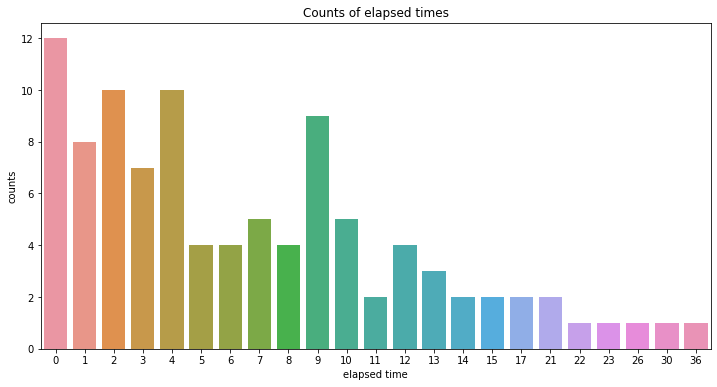

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

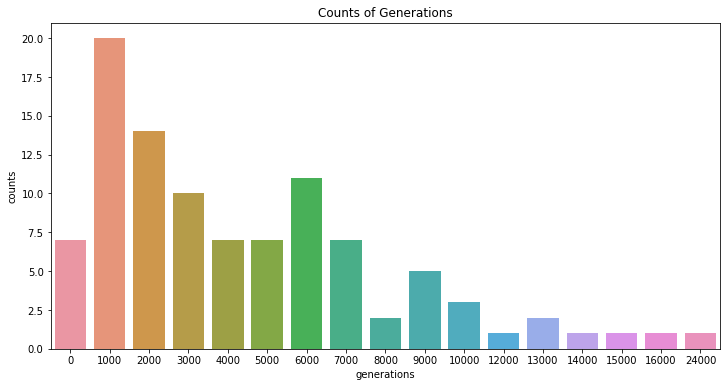

In [34]:
plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)